In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/nhandienmonan'

/content/drive/MyDrive/nhandienmonan


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [5]:
training=train_datagen.flow_from_directory('/content/drive/MyDrive/nhandienmonan/train',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 1000 images belonging to 10 classes.


In [6]:
test=train_datagen.flow_from_directory('/content/drive/MyDrive/nhandienmonan/test',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 200 images belonging to 10 classes.


In [9]:
model=Sequential() 
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 69, 69, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                  

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(training,batch_size=32,epochs=100,verbose=1,validation_data=test,callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
50/50 [==============================] - 27s 517ms/step - loss: 0.4670 - accuracy: 0.9420 - val_loss: 4.8215 - val_accuracy: 0.4200
Epoch 2/100
50/50 [==============================] - 25s 505ms/step - loss: 0.1654 - accuracy: 0.9630 - val_loss: 3.9007 - val_accuracy: 0.4700
Epoch 3/100
50/50 [==============================] - 26s 515ms/step - loss: 0.2719 - accuracy: 0.9450 - val_loss: 4.3684 - val_accuracy: 0.4750
Epoch 4/100
50/50 [==============================] - 25s 505ms/step - loss: 0.1529 - accuracy: 0.9600 - val_loss: 4.8528 - val_accuracy: 0.4350
Epoch 5/100
50/50 [==============================] - 25s 507ms/step - loss: 0.1719 - accuracy: 0.9670 - val_loss: 4.8134 - val_accuracy: 0.4900
Epoch 6/100
50/50 [==============================] - 25s 504ms/step - loss: 0.2304 - accuracy: 0.9620 - val_loss: 5.2626 - val_accuracy: 0.4250
Epoch 7/100
50/50 [==============================] - 25s 501ms/step - loss: 0.2049 - accuracy: 0.9510 - val_loss: 4.4116 - val_accuracy:

In [15]:
Score=model.evaluate(training,verbose=0)
print('Test Loss', Score[0])
print('Test Accuracy', Score[1])

Test Loss 0.020857281982898712
Test Accuracy 0.9940000176429749


<function matplotlib.pyplot.show>

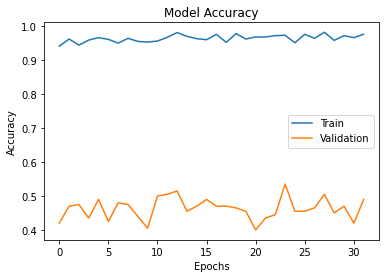

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [12]:
model.save('nhandienmonan.h5')

In [13]:
model_nhandien=load_model('nhandienmonan.h5')

In [14]:
training.class_indices

{'banh chung': 0,
 'banh khot': 1,
 'banh mi': 2,
 'banh pia': 3,
 'banh tet': 4,
 'banh trang nuong': 5,
 'banh xeo': 6,
 'goi cuon': 7,
 'nem chua': 8,
 'xoi xeo': 9}

BANH XEO


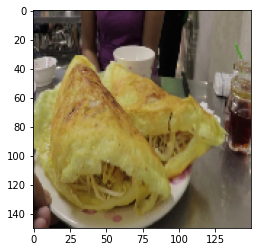

In [19]:
img=load_img('/content/drive/MyDrive/nhandienmonan/test/banh xeo/151.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('BANH CHUNG')
if a[0]==1:
  print('BANH KHOT')
if a[0]==2:
  print('BANH MI')
if a[0]==3:
  print('BANH PIA')
if a[0]==4:
  print('BANH TET')
if a[0]==5:
  print('BANH TRANG NUONG')
if a[0]==6:
  print('BANH XEO')
if a[0]==7:
  print('GOI CUON')
if a[0]==8:
  print('NEM CHUA')
if a[0]==9:
  print('XOI XEO')

BANH TET


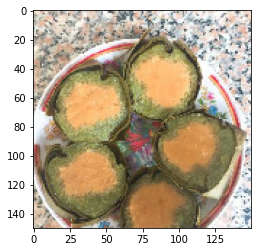

In [18]:
img=load_img('/content/drive/MyDrive/nhandienmonan/test/banh tet/173.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('BANH CHUNG')
if a[0]==1:
  print('BANH KHOT')
if a[0]==2:
  print('BANH MI')
if a[0]==3:
  print('BANH PIA')
if a[0]==4:
  print('BANH TET')
if a[0]==5:
  print('BANH TRANG NUONG')
if a[0]==6:
  print('BANH XEO')
if a[0]==7:
  print('GOI CUON')
if a[0]==8:
  print('NEM CHUA')
if a[0]==9:
  print('XOI XEO')

BANH PIA


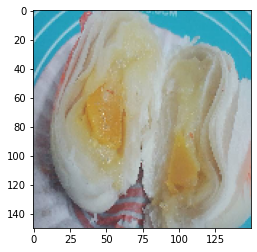

In [20]:
img=load_img('/content/drive/MyDrive/nhandienmonan/test/banh pia/168.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('BANH CHUNG')
if a[0]==1:
  print('BANH KHOT')
if a[0]==2:
  print('BANH MI')
if a[0]==3:
  print('BANH PIA')
if a[0]==4:
  print('BANH TET')
if a[0]==5:
  print('BANH TRANG NUONG')
if a[0]==6:
  print('BANH XEO')
if a[0]==7:
  print('GOI CUON')
if a[0]==8:
  print('NEM CHUA')
if a[0]==9:
  print('XOI XEO')

BANH MI


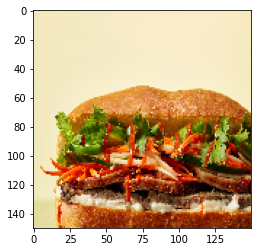

In [24]:
img=load_img('/content/drive/MyDrive/nhandienmonan/test/banh mi/150.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('BANH CHUNG')
if a[0]==1:
  print('BANH KHOT')
if a[0]==2:
  print('BANH MI')
if a[0]==3:
  print('BANH PIA')
if a[0]==4:
  print('BANH TET')
if a[0]==5:
  print('BANH TRANG NUONG')
if a[0]==6:
  print('BANH XEO')
if a[0]==7:
  print('GOI CUON')
if a[0]==8:
  print('NEM CHUA')
if a[0]==9:
  print('XOI XEO')

In [25]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('nhandienmonan.ipynb')